# Exploratory Data Analysis (EDA) on Spotify Dataset

In this project, I’ve compiled and analyzed a dataset with over 500,000 songs from Spotify, one of the world’s most popular music streaming platforms.

The aim of this analysis is to explore how music varies across genres, moods, and years — and ultimately answer key questions about what makes a song feel good, energetic, or relaxing. The analysis focuses on mood-related metrics like valence, energy, and danceability, as well as temporal and genre-based patterns.

Here are the main questions addressed in this project:
1.	What are the top 10 songs with the highest “feel-good” vibes?
2.	Which artist transmits the most overall flow based on average mood-related metrics?
3.	What are the TOP 3 songs in different contexts:
- 🎉 Party
- 💻 Work
- 🏋️‍♂️ Exercise
- 🧘 Relaxation
- 🚗 Driving
4.	How has the positivity index (valence) evolved year by year?
5.	What does the distribution of song quantity look like per year and genre?
6.	Includes a final personal analysis, exploring subjective observations and musical curiosities.

Feel free to dive into the data and enjoy the journey through 500,000 tracks of musical insights!

# Importing Libraries and Loading the data

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import urllib.request
from zipfile import ZipFile

# Create folders if they doesn't exist
os.makedirs('../archive', exist_ok=True)
os.makedirs('../data', exist_ok=True)

# Define paths
zip_path = '../archive/900k-spotify.zip'
csv_path = '../data/spotify_dataset.csv'

# Download the dataset if the ZIP file doesn't exist
if not os.path.exists(zip_path):
    print("Downloading ZIP file from Kaggle...")
    os.system('kaggle datasets download -d devdope/900k-spotify -p ../archive')
else:
    print("ZIP file already exists. Skipping download.")

# Extract the dataset if the CSV file doesn't exist
if not os.path.exists(csv_path):
    print("Extracting ZIP file...")
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('../data/')
else:
    print("CSV file already exists. Skipping extraction.")


# Create DataFrame
df = pd.read_csv(csv_path)
df.head()

ZIP file already exists. Skipping download.
CSV file already exists. Skipping extraction.


,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,Loudness (db),Time signature,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,-6.85db,4/4,No,40,83,71,87,4,16,11,0,0,0,0,0,0,0,0,0,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,-5.75db,4/4,No,42,85,70,87,4,32,0,0,0,0,0,0,0,0,0,0,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,-6.06db,4/4,No,29,89,71,63,8,64,0,20,0,0,0,1,0,0,0,0,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,-5.42db,4/4,No,24,84,78,97,4,12,12,0,0,0,0,1,0,0,0,0,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,-5.57db,4/4,No,30,71,77,70,7,10,4,1,0,0,0,1,0,0,0,0,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


# Data Cleaning and Manipulation

## Identify Duplicate or Irrelevant Data

In [307]:
df[['song', 'Artist(s)']].duplicated().value_counts()

False    498052
True      53391
Name: count, dtype: int64

## Fix Structural Errors

### Define Errors

- Convert all column names to lowercase to make data manipulation easier and more consistent.
- Create column based on the duration of the lenght column
- Set release date to datetime
- Group duplicates by song and artist

#### Convert all column names to lowercase

In [308]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#### Create length_seconds column based on the duration of the length column

In [309]:
df['length_seconds'] = df['length'].apply(
    lambda x: sum(int(t) * 60 ** i for i, t in enumerate(reversed(x.split(':')))) if isinstance(x, str) and ':' in x else np.nan
)

#### Set release date to datetime

In [310]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#### Group duplicates by song and artist

In [311]:
df = df.drop_duplicates(subset=['song','artist(s)'])
df[['song', 'artist(s)']].duplicated().value_counts()

False    498052
Name: count, dtype: int64

## Filter outliers 

In [312]:
pd.set_option('display.max_columns', None)
df.describe()

,release_date,tempo,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness,good_for_party,good_for_work/study,good_for_relaxation/meditation,good_for_exercise,good_for_running,good_for_yoga/stretching,good_for_driving,good_for_social_gatherings,good_for_morning_routine,similarity_score_1,similarity_score_2,similarity_score_3,length_seconds
count,350369,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000,498052.000000
mean,2012-05-08 12:27:06.924756224,120.780178,30.486453,62.744027,58.285191,47.067467,11.397157,19.787725,26.056827,7.361777,0.051639,0.077363,0.031744,0.184005,0.053199,0.022034,0.054735,0.009290,0.063618,0.982887,0.977765,0.974715,224.457820
min,1900-01-17 00:00:00,31.000000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002656,0.002647,0.002647,5.000000
25%,2009-10-09 00:00:00,97.000000,19.000000,48.000000,46.000000,28.000000,4.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.976614,0.970859,0.967244,179.000000
50%,2017-01-06 00:00:00,120.000000,28.000000,65.000000,59.000000,46.000000,6.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.984911,0.980117,0.977254,214.000000
75%,2019-12-06 00:00:00,140.000000,40.000000,81.000000,71.000000,66.000000,14.000000,25.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.991553,0.987161,0.984789,256.000000
max,2024-08-16 00:00:00,200.000000,100.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3572.000000
std,NaN,29.262887,17.189269,22.688164,17.352930,24.091678,12.282150,16.310829,29.618874,20.736406,0.221298,0.267167,0.175317,0.387489,0.224431,0.146794,0.227463,0.095937,0.244071,0.013297,0.014951,0.015961,84.679868


To assess the presence of outliers in the dataset, I examined the summary statistics of the numerical columns using the .describe() method. 

Overall, most values fall within expected ranges for audio features such as tempo, energy, danceability, and popularity. However, two columns stand out for potential outliers:
- length_seconds: While the average song duration is reasonable (around 3 minutes and 44 seconds), the minimum value is 5 seconds and the maximum is nearly an hour (3572 seconds). These extreme values likely correspond to very short audio clips or live performances. Depending on the analysis goal, it may be useful to filter out tracks that are shorter than 30 seconds or longer than 20 minutes.
- release_date: The range includes dates as early as 1900, which may not be accurate. Such early dates could represent missing or incorrectly parsed values. Filtering out tracks released before 1950 could improve the overall data quality.

In conclusion, while there are no extreme or highly suspicious outliers in most columns, but i'll check these two values.

In [313]:
# Checking the long song, it is correct after checking on Spotify
df[df['length_seconds'] == df['length_seconds'].max()]

,artist(s),song,text,length,emotion,genre,album,release_date,key,tempo,loudness_(db),time_signature,explicit,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness,good_for_party,good_for_work/study,good_for_relaxation/meditation,good_for_exercise,good_for_running,good_for_yoga/stretching,good_for_driving,good_for_social_gatherings,good_for_morning_routine,similar_artist_1,similar_song_1,similarity_score_1,similar_artist_2,similar_song_2,similarity_score_2,similar_artist_3,similar_song_3,similarity_score_3,length_seconds
513937,"Ultimate Rap League,Jaz the Rapper,O'fficial",Jaz The Rapper vs. Official,[Round 1: Jaz The Rapper] Y’all smell that? Ir...,59:32,anger,jazz,N.O.M.E. 5 (Live),2015-05-09,C# Maj,81,-14.07db,4/4,Yes,0,36,54,59,94,65,96,0,0,0,0,0,0,0,0,0,0,"Ultimate Rap League,Cassidy,Goodz",Cassidy vs. Arsonal,0.997455,"Ultimate Rap League,Arsonal,Geechi Gotti",Arsonal vs. Geechi Gotti,0.995412,"Ultimate Rap League,John John Da Don,Mr Wavy",Hitman Holla vs. John John Da Don,0.99472,3572


In [314]:
# Checking the old songs
df[df['release_date'].dt.year == 1900]

,artist(s),song,text,length,emotion,genre,album,release_date,key,tempo,loudness_(db),time_signature,explicit,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness,good_for_party,good_for_work/study,good_for_relaxation/meditation,good_for_exercise,good_for_running,good_for_yoga/stretching,good_for_driving,good_for_social_gatherings,good_for_morning_routine,similar_artist_1,similar_song_1,similarity_score_1,similar_artist_2,similar_song_2,similarity_score_2,similar_artist_3,similar_song_3,similarity_score_3,length_seconds
49138,Big Ben Banjo Band,Do It Big,[Intro: Ava Lily] I'mma do it I'mma do it I'mm...,02:23,sadness,hip hop,Party Packet,1900-01-30,C Maj,126,-13.13db,4/4,No,1,41,86,93,11,3,83,97,0,0,0,0,0,0,0,0,0,Sirocco,Trap Back Bumpin Freestyle,0.986525,Bossa Nova Jazz,F With U,0.978716,"Ros Sereisothea,Pen Ran",Millionaire,0.977055,143
57249,Blind Willie McTell,Southern Can Is Mine,Now looka here mama let me tell you this If yo...,03:13,anger,blues,The Early Years,1900-01-29,G# Maj,114,-25db,4/4,No,16,10,69,90,18,18,98,0,0,0,0,0,0,0,0,0,0,Victoria Wood,Pam,0.989838,Robert Johnson,Ramblin On My Mind Take 2,0.966355,Joel Samberg & Benny Bell,Shaving Cream,0.964407,193
57251,Blind Willie McTell,The Dyin Crapshooters Blues,"Little Jesse was a gambler, night and day He u...",03:09,sadness,blues,The Legendary Library Of Congress Session,1900-01-29,D min,139,-23.84db,4/4,No,1,5,69,63,17,22,99,0,0,0,0,0,0,0,0,0,0,Memphis Minnie,Dirty Mother for You,0.971451,Nat King Cole Trio,I'll Never Say Never Again,0.968802,"Frank Sinatra,The Charioteers",Jesus Is A Rock In The Weary Land,0.966888,189
63167,Bonnie Guitar,Dark Moon,"Dark moon Away up high up in the sky Oh, tell ...",02:43,sadness,hip hop,Dark Moon,1900-01-29,A Maj,86,-18db,4/4,No,23,4,58,36,3,10,98,0,0,1,1,0,0,1,0,0,0,Celine Josephina,Time Time Time Time,0.995518,Zach Bolen,I Want to Die,0.995404,John C. Reilly,Have You Heard the News / Dewey Cox Died,0.995171,163
393342,"Richard Strauss,Johann Strauss II,Wolfgang Ama...",Do It For The Gang,"[Intro: NitoNB, Sav12] Oppsdem know my NGang b...",04:30,joy,hip hop,120 Music Masterpieces,1900-01-30,C# Maj,151,-26.35db,4/4,No,0,4,14,8,4,11,98,93,0,0,0,0,0,0,0,0,0,Inspiring New Age Collection,Mind Sex,0.997182,Meditation Music Zone,6 2 1 5,0.989946,Jack Edwards,Fly On,0.984901,270
393343,"Richard Strauss,Johann Strauss II,Wolfgang Ama...",12AM,[Chorus: C A L E B] I was lookin' at the clock...,08:41,joy,hip hop,120 Music Masterpieces,1900-01-30,D Maj,133,-25.5db,4/4,No,12,9,45,35,4,26,98,84,0,0,0,0,0,0,0,0,0,"Pyotr Ilyich Tchaikovsky,Hector Berlioz,Johann...",You Are So Beautiful,0.972818,Colour Haze,Inside,0.965596,Chet Baker,Blue room,0.959847,521
393344,"Richard Strauss,Johann Strauss II,Wolfgang Ama...",Made of Fire,"Made of fire, I'm made of fire Falling, free ...",05:07,love,pop,120 Music Masterpieces,1900-01-30,G Maj,78,-21.39db,4/4,No,0,15,30,30,4,10,98,75,0,1,1,0,0,1,0,0,0,Christian Guitar,How Great Thou Art,0.986620,The Cat and Owl,Go Dung,0.985437,Geo Symphony Orchestra,Virgin,0.981822,307
420793,Shirley Temple,Animal Crackers In My Soup,"Animal Crackers In My Soup My mother said: ""My...",02:36,joy,hip hop,30 Original Recordings,1900-01-30,G min,84,-18.19db,4/4,No,26,18,65,85,5,15,100,71,0,1,1,0,0,1,0,0,0,Mississippi John Hurt,Since Ive Laid My Burden Down,0.985470,Yvonne Elliman,Hello Stranger,0.979805,Elliot Gordon,A Very Merry Christmas,0.974474,156
420794,Shirley Temple,At The Codfish Ball,Lyrics/Music S. Mitchell/L. Pollack Next Frida...,02:02,joy,hip hop,30 Original Recordings,1900-01-30,C# Maj,81,-22.27db,4/4,No,3,19,62,93,14,26,99,85,0,1,1,0,0,1,0,0,0,"Relax Radio 1,Relaxing Chill Out Music,Soft Ja...",Take Out,0.982258,"Various Composers,Billy Joel,Andrew Holdsworth",BattEm Up,0.979722,Relaxing Piano Music: Greatest Hymns: Best Lov...,In The Garden,0.967407,122
420801,Shirley Temple,Early Bird,Shirley Temple Miscellaneous Early Bird Good m...,02:02,joy,hip hop,30 Original Rec

It’s funny to see Richard Strauss, Johann Strauss II, and Mozart listed as having a song together called “Do it For The Gang”. But obviously, all 11 of these songs have incorrect release dates, so I’ll delete them.

In [315]:
df = df[df['release_date'].dt.year != 1900]

After this, I double-checked the oldest songs and confirmed that two from 1903 are correct, they’re by Billy Murray!

## Dealing with NANs

In [316]:
df.isna().any()

artist(s)                         False
song                               True
text                              False
length                            False
emotion                           False
genre                             False
album                              True
release_date                       True
key                               False
tempo                             False
loudness_(db)                     False
time_signature                     True
explicit                          False
popularity                        False
energy                            False
danceability                      False
positiveness                      False
speechiness                       False
liveness                          False
acousticness                      False
instrumentalness                  False
good_for_party                    False
good_for_work/study               False
good_for_relaxation/meditation    False
good_for_exercise                 False


In [317]:
for column in df.columns:
    print(f"{column}: {len(df[df[column].isna()])}")

artist(s): 0
song: 14
text: 0
length: 0
emotion: 0
genre: 0
album: 49
release_date: 147683
key: 0
tempo: 0
loudness_(db): 0
time_signature: 8
explicit: 0
popularity: 0
energy: 0
danceability: 0
positiveness: 0
speechiness: 0
liveness: 0
acousticness: 0
instrumentalness: 0
good_for_party: 0
good_for_work/study: 0
good_for_relaxation/meditation: 0
good_for_exercise: 0
good_for_running: 0
good_for_yoga/stretching: 0
good_for_driving: 0
good_for_social_gatherings: 0
good_for_morning_routine: 0
similar_artist_1: 0
similar_song_1: 19
similarity_score_1: 0
similar_artist_2: 0
similar_song_2: 16
similarity_score_2: 0
similar_artist_3: 0
similar_song_3: 4
similarity_score_3: 0
length_seconds: 0


Looks like we have a problem with the release_date. For our EDA, it only affects the ‘What does the distribution of song quantity look like per year and genre?’ question, so for now, I’ll delete the other NaNs except this one.

In [318]:
df = df.dropna(subset=[col for col in df.columns if col != 'release_date'])

## Validate our data

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497931 entries, 0 to 551442
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   artist(s)                       497931 non-null  object        
 1   song                            497931 non-null  object        
 2   text                            497931 non-null  object        
 3   length                          497931 non-null  object        
 4   emotion                         497931 non-null  object        
 5   genre                           497931 non-null  object        
 6   album                           497931 non-null  object        
 7   release_date                    350278 non-null  datetime64[ns]
 8   key                             497931 non-null  object        
 9   tempo                           497931 non-null  int64         
 10  loudness_(db)                   497931 non-null  object      

We used `df.info()` to inspect the structure of our dataset. The dataset contains **497,931 entries** and **40 columns**.

- All columns except `release_date` are fully populated (no missing values).
- The `release_date` column has **350,278 non-null values**, meaning around **147,653 rows are missing** this information.
- The data types are generally appropriate:
  - Most numeric features are stored as `int64` or `float64`.
  - The `release_date` column is correctly stored as `datetime64[ns]`, which will be useful for temporal analysis.
  - Categorical and textual data are stored as `object`.

For our EDA, we will **keep the missing values in `release_date`** (as they only affect one specific analysis), and we will drop the rest of the missing values in the dataset.

# EDA

In [320]:
df.head()

,artist(s),song,text,length,emotion,genre,album,release_date,key,tempo,loudness_(db),time_signature,explicit,popularity,energy,danceability,positiveness,speechiness,liveness,acousticness,instrumentalness,good_for_party,good_for_work/study,good_for_relaxation/meditation,good_for_exercise,good_for_running,good_for_yoga/stretching,good_for_driving,good_for_social_gatherings,good_for_morning_routine,similar_artist_1,similar_song_1,similarity_score_1,similar_artist_2,similar_song_2,similarity_score_2,similar_artist_3,similar_song_3,similarity_score_3,length_seconds
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,2013-04-29,D min,105,-6.85db,4/4,No,40,83,71,87,4,16,11,0,0,0,0,0,0,0,0,0,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236,227
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,2013-04-29,A# min,117,-5.75db,4/4,No,42,85,70,87,4,32,0,0,0,0,0,0,0,0,0,0,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483,243
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,2004-06-08,A Maj,121,-6.06db,4/4,No,29,89,71,63,8,64,0,20,0,0,0,1,0,0,0,0,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752,351
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,2015-10-16,A min,122,-5.42db,4/4,No,24,84,78,97,4,12,12,0,0,0,0,1,0,0,0,0,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381,224
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,2015-10-16,F min,123,-5.57db,4/4,No,30,71,77,70,7,10,4,1,0,0,0,1,0,0,0,0,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415,360


In [321]:
df['emotion'].unique()

array(['sadness', 'joy', 'love', 'surprise', 'anger', 'fear', 'angry',
       'True', 'thirst', 'confusion', 'pink', 'interest', 'Love'],
      dtype=object)

In [322]:
df.columns

Index(['artist(s)', 'song', 'text', 'length', 'emotion', 'genre', 'album',
       'release_date', 'key', 'tempo', 'loudness_(db)', 'time_signature',
       'explicit', 'popularity', 'energy', 'danceability', 'positiveness',
       'speechiness', 'liveness', 'acousticness', 'instrumentalness',
       'good_for_party', 'good_for_work/study',
       'good_for_relaxation/meditation', 'good_for_exercise',
       'good_for_running', 'good_for_yoga/stretching', 'good_for_driving',
       'good_for_social_gatherings', 'good_for_morning_routine',
       'similar_artist_1', 'similar_song_1', 'similarity_score_1',
       'similar_artist_2', 'similar_song_2', 'similarity_score_2',
       'similar_artist_3', 'similar_song_3', 'similarity_score_3',
       'length_seconds'],
      dtype='object')

## 1.	What are the top 10 songs with the highest “feel-good” vibes?


In [323]:
# Filtering the DataFrame for songs with 'joy' emotion and sorting by 'positiveness', that give the feel-good songs

df_feel_good = df[df['emotion'] == 'joy'].sort_values(by='positiveness', ascending=False).head(10)

df_feel_good[['song', 'artist(s)']].reset_index(drop=True).set_index(pd.Index(range(1, 11)))

,song,artist(s)
1,​Distance,Mischa Frey
2,Proud Lady,Julio Gladston
3,Moving On,Emma Memma
4,Gummi Bears Theme From The Adventures of the G...,Gummibär
5,A Baby is Born,Toby Fox
6,Whats Your Name?,Depeche Mode
7,May There Be Peace,Beau Jingles
8,Night Rider,Midnight Star
9,Stuck With You,Sonus Band
10,Sister,Princess Power


## 2.	Which artist transmits the most overall flow based on average mood-related metrics?

In [324]:
# I understand flow as the combination of speechiness, energy and danceability, so i'll create a new column based on the mean of these three features

df['flow'] = df[['speechiness', 'energy', 'danceability']].mean(axis=1)

In [325]:
# Finding the top artist based on the average flow of their songs

artist_flow = df.groupby('artist(s)')['flow'].mean().reset_index()
top_artist_flow = artist_flow.sort_values(by='flow', ascending=False).head(1)

top_artist_flow.reset_index(drop=True).set_index(pd.Index(range(1, 2)))

,artist(s),flow
1,"Sammy Virji,Yemi",82.666667


## 3.	What are the TOP 3 songs in different contexts

### 3.1 Party

In [326]:
# Finding the top 3 songs for parties based on danceability and if they are good for party

top_party_songs = df[df['good_for_party'] == 1].sort_values(by='danceability', ascending=False).head(3)

top_party_songs[['song','artist(s)']].reset_index(drop=True).set_index(pd.Index(range(1, 4)))

,song,artist(s)
1,Two Left Feet Flow,Boobie Lootaveli
2,Loced Out,Devilish Trio
3,Kittyana Thotiana remix,Megan Thee Stallion


### 3.2 Work

In [327]:
# To identify the best songs for focus and concentration, I filtered tracks with a tempo between 60–80 BPM 
# and sorted them by instrumentalness to prioritize music with minimal vocals.

top_work_songs = df[
    (df['tempo'] >= 60) &
    (df['tempo'] <= 80) &
    (df['good_for_work/study'] == 1)
    ].sort_values(by='instrumentalness', ascending=False).head(3)

top_work_songs[['song', 'artist(s)']].reset_index(drop=True).set_index(pd.Index(range(1, 4)))

,song,artist(s)
1,Interlude,G-Eazy
2,Back Home,Comet 1993
3,Things I Love,Sleeping At Last


### 3.3 Exercise

In [328]:
# To find the top 3 exercise songs, I will focus on those with the highest energy, 
# a tempo above 80 BPM, and the greatest loudness (dB).

top_exercise_songs = df[
    (df['tempo'] > 80) &
    (df['good_for_exercise'] == 1)
    ].sort_values(by=['energy', 'loudness_(db)'], ascending=False).head(3)

top_exercise_songs[['song', 'artist(s)']].reset_index(drop=True).set_index(pd.Index(range(1, 4)))

,song,artist(s)
1,LURK,1 800 PAIN
2,LEGO,1 800 PAIN
3,Red Light,Scarlxrd


### 3.4 Relaxation

In [329]:
# To find the top 3 songs for relaxation or meditation, 
# I will filter for a tempo of 70 BPM or less, high acousticness and instrumentalness,
# and songs labeled as good for relaxation/meditation.

top_relax_songs = df[
    (df['tempo'] <= 70) &
    (df['good_for_relaxation/meditation'] == 1)
].sort_values(
    by=['instrumentalness', 'acousticness'], 
    ascending=False
).head(3)

top_relax_songs[['song', 'artist(s)']].reset_index(drop=True).set_index(pd.Index(range(1, 4)))

,song,artist(s)
1,Where Would I Be The Question,Astral Wonder
2,Breathing,Space Atmosphere
3,Yankee Doodle Boy,Sleepy World


### 3.5 Driving

In [330]:
# To find the top 3 songs for driving, 
# I will filter for a tempo between 90 and 120 BPM, 
# and select those labeled as good for driving,
# then sort by energy and positiveness, avoiding songs that are too aggressive or too sleepy.

top_driving_songs = df[
    (df['tempo'] >= 90) &
    (df['tempo'] <= 120) &
    (df['good_for_driving'] == 1)
].sort_values(
    by=['energy', 'positiveness'], 
    ascending=False
).head(3)

top_driving_songs[['song', 'artist(s)']].reset_index(drop=True).set_index(pd.Index(range(1, 4)))

,song,artist(s)
1,Leopard-Skin Pill Box Hat,Bob Dylan
2,When The Daylight Comes,Ian Hunter
3,Never Wanna Fall in Love With U,nelward


## 4.	How has the positivity index evolved year by year?


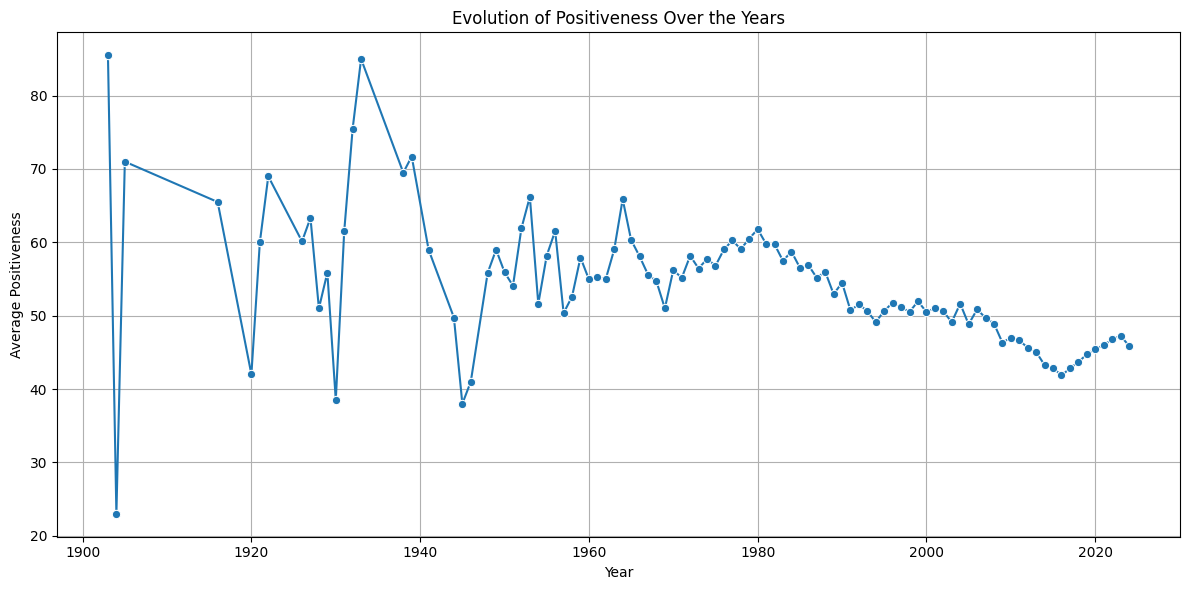

In [331]:
# Extract year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Calculate the average positiveness for each year
yearly_positiveness = df.groupby('release_year')['positiveness'].mean().reset_index()

# Plotting the average positiveness over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_positiveness, x='release_year', y='positiveness', marker='o')
plt.title('Evolution of Positiveness Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Positiveness')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.	What does the distribution of song quantity look like per year and genre?

I've noticed that the columns genres usually have more than one genre separated by a coma, so first i'll create a new column for each of those who have more than one genre for easiest visualization

In [335]:
# For clarity, i'll group sub-genres into broader categories
df['genre'].unique()

array(['hip hop', 'jazz', 'indie rock,britpop', ...,
       'classical,heavy metal,ambient', 'chillout,ambient,house',
       'alternative,punk,rock'], dtype=object)

In [343]:
# Mapping sub-genres to broader genres
original_mapping = {
    'pop': 'indie pop, pop, pop rock, folk, britpop, j-pop, dream pop, k-pop, pop punk',
    'rock': 'rock, country, blues, alternative rock, psychedelic rock, garage rock, classic rock, hard rock, new wave, alt-country, grunge, math rock, punk, indie, alternative',
    'metal': 'heavy metal, metal, emo, power metal, post-hardcore, progressive metal, thrash metal, black metal, death metal, doom metal, melodic death metal, metalcore, nu metal, deathcore, screamo',
    'electronic': 'electronic, industrial, electro, techno, trance, house, drum and bass, ambient, experimental, lo-fi, dance, trip-hop, chillout, chillwave, synthpop, electropop',
    'hip hop': 'hip hop, rap, trap, cloud rap, hip-hop, emo rap, rnb, grime',
    'classic': 'classical, jazz, swing, gospel',
    'others': 'comedy, soundtrack, worship, soul, disco, christian',
    'latin': 'reggaeton, dancehall, latin',
    'reggae': 'reggae, dub'
}

# Explode the 'genre' column to handle multiple genres per song
genre_mapping = {}
for broad_genre, subgenres in original_mapping.items():
    for sub in subgenres.split(','):
        genre_mapping[sub.strip()] = broad_genre

# Exploding the 'genre' column to handle multiple genres per song
df_exploded = (
  df.copy()
    .assign(genre=lambda d: d['genre'].str.split(','))
    .explode('genre')
    .assign(genre=lambda d: d['genre'].str.strip())
)

# Map sub-genres to broader genres
df_exploded['genre'] = df_exploded['genre'].map(genre_mapping)
df_exploded = df_exploded.dropna(subset=['genre'])

year_genre_counts = df_exploded.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Plotting the song quantity by year and genre
fig = px.scatter(year_genre_counts, x='release_year', y='count',
                 color='genre',
                 size='count',
                 opacity=0.5)

# Setting the size of the markers based on the count, showing period from 1960 to 2025
fig.update_layout(
    title='Song Quantity by Year and Genre',
    font=dict(family='Verdana', size=12, color='Gray'),
    height=600,
    width=1200,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        gridcolor='lightgray',
        zeroline=False,
        range=[1960,2025]
    ),
    yaxis=dict(
        gridcolor='lightgray',
        zeroline=False
    )
)

fig.show()

## 6.	Final personal analysis, exploring subjective observations and musical curiosities.

### 6.1 Most popular key in songs

/var/folders/vx/s1n_nwt56vldccrmk2pd6t3w0000gn/T/ipykernel_18392/3366313222.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




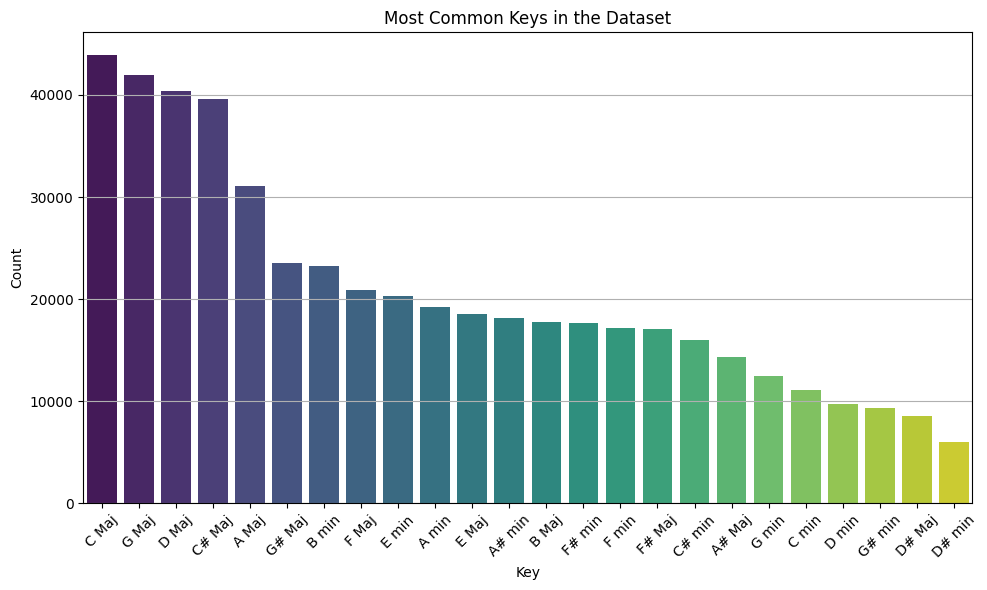

In [352]:
# Finding the most common keys in the dataset
most_common_keys = df['key'].value_counts().reset_index()
most_common_keys.columns = ['key', 'count']

# Plotting the most common keys
plt.figure(figsize=(10, 6))
sns.barplot(data=most_common_keys, x='key', y='count', palette='viridis')
plt.title('Most Common Keys in the Dataset')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 6.2 Most popular key by genre

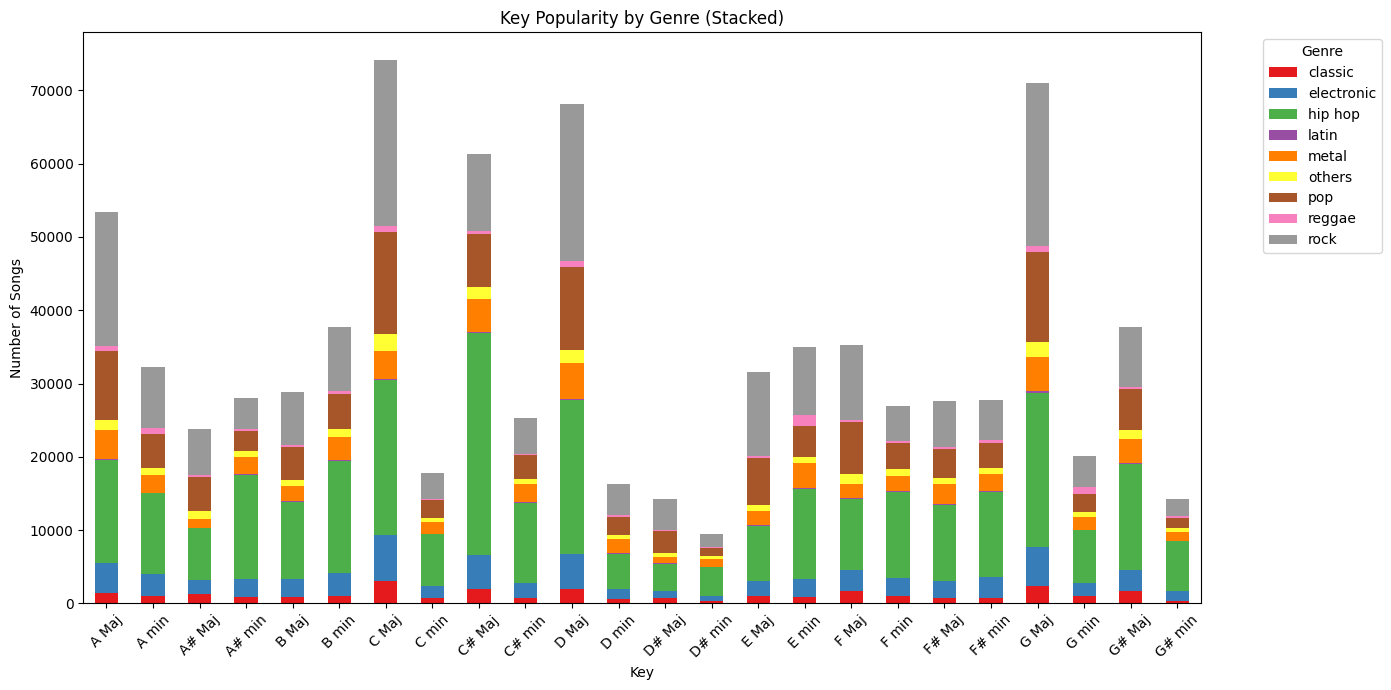

In [363]:
# Grouping by key and genre to find the count of songs in each key-genre combination
key_genre_counts = df_exploded.groupby(['key', 'genre']).size().reset_index(name='count')

# Creating a pivot table for better visualization
pivot_table = key_genre_counts.pivot_table(index='key', columns='genre', values='count', fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set1')

# Plotting the count of songs by key and genre
plt.title('Key Popularity by Genre (Stacked)')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gràfic
plt.show()